# **k MEANS CLUSTERING**


---



---



In [ ]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

     - 829kB 822kB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=1269759 sha256=e3c63e75327cadd47934472fc2310d910de8b37b80b5b3459e80b08a4c18e90a
  Stored in directory: /tmp/pip-ephem-wheel-cache-3s2rrzpo/wheels/d3/a5/a8/411bc2d0939f2cc9d17f34f0d3457043c68e14a98b91fd8301
Successfully built scikit-learn-extra


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
from sklearn import datasets
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target

x_db = x
y_db = y

In [ ]:
#k MEANS ON IRIS
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
#type(y_kmeans)

numpy.ndarray

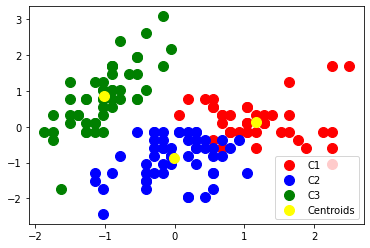

In [ ]:
#VISUALIZATIONS
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [ ]:
#ARI
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(y, y_kmeans))
#SILHOUETTE COEFFICIENT
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_kmeans ))
#NMI
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
print("Normalized Mutual Info: %0.3f"% NMI(y, y_kmeans))


Adjusted Rand Index: 0.592
Silhouette Coefficient: 0.463
Normalized Mutual Info: 0.643


# **K MEDOIDS**

---

---





In [ ]:
from __future__ import print_function, division
import numpy as np
#from mlfromscratch.utils import normalize, euclidean_distance, Plot
#from mlfromscratch.unsupervised_learning import PCA
import math
def euclidean_distance(x1, x2):
        distance = 0
    # Squared distance between each coordinate
        for i in range(len(x1)):
             distance += pow((x1[i] - x2[i]), 2)
        return math.sqrt(distance)


class PAM():
    """A simple clustering method that forms k clusters by first assigning
    samples to the closest medoids, and then swapping medoids with non-medoid
    samples if the total distance (cost) between the cluster members and their medoid
    is smaller than prevoisly.
    Parameters:
    -----------
    k: int
        The number of clusters the algorithm will form.
    """
    def __init__(self, k=2):
        self.k = k

    def _init_random_medoids(self, X):
        """ Initialize the medoids as random samples """
        n_samples, n_features = np.shape(X)
        medoids = np.zeros((self.k, n_features))
        for i in range(self.k):
            medoid = X[np.random.choice(range(n_samples))]
            medoids[i] = medoid
        return medoids

    def _closest_medoid(self, sample, medoids):
        """ Return the index of the closest medoid to the sample """
        closest_i = None
        closest_distance = float("inf")
        for i, medoid in enumerate(medoids):
            distance = euclidean_distance(sample, medoid)
            if distance < closest_distance:
                closest_i = i
                closest_distance = distance
        return closest_i

    def _create_clusters(self, X, medoids):
        """ Assign the samples to the closest medoids to create clusters """
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            medoid_i = self._closest_medoid(sample, medoids)
            clusters[medoid_i].append(sample_i)
        return clusters

    def _calculate_cost(self, X, clusters, medoids):
        """ Calculate the cost (total distance between samples and their medoids) """
        cost = 0
        # For each cluster
        for i, cluster in enumerate(clusters):
            medoid = medoids[i]
            for sample_i in cluster:
                # Add distance between sample and medoid as cost
                cost += euclidean_distance(X[sample_i], medoid)
        return cost

    def _get_non_medoids(self, X, medoids):
        """ Returns a list of all samples that are not currently medoids """
        non_medoids = []
        for sample in X:
            if not sample in medoids:
                non_medoids.append(sample)
        return non_medoids

    def _get_cluster_labels(self, clusters, X):
        """ Classify samples as the index of their clusters """
        # One prediction for each sample
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i in range(len(clusters)):
            cluster = clusters[cluster_i]
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    def predict(self, X):
        """ Do Partitioning Around Medoids and return the cluster labels """
        # Initialize medoids randomly
        medoids = self._init_random_medoids(X)
        # Assign samples to closest medoids
        clusters = self._create_clusters(X, medoids)

        # Calculate the initial cost (total distance between samples and
        # corresponding medoids)
        cost = self._calculate_cost(X, clusters, medoids)

        # Iterate until we no longer have a cheaper cost
        while True:
            best_medoids = medoids
            lowest_cost = cost
            for medoid in medoids:
                # Get all non-medoid samples
                non_medoids = self._get_non_medoids(X, medoids)
                # Calculate the cost when swapping medoid and samples
                for sample in non_medoids:
                    # Swap sample with the medoid
                    new_medoids = medoids.copy()
                    new_medoids[medoids == medoid] = sample
                    # Assign samples to new medoids
                    new_clusters = self._create_clusters(X, new_medoids)
                    # Calculate the cost with the new set of medoids
                    new_cost = self._calculate_cost(
                        X, new_clusters, new_medoids)
                    # If the swap gives us a lower cost we save the medoids and cost
                    if new_cost < lowest_cost:
                        lowest_cost = new_cost
                        best_medoids = new_medoids
            # If there was a swap that resultet in a lower cost we save the
            # resulting medoids from the best swap and the new cost
            if lowest_cost < cost:
                cost = lowest_cost
                medoids = best_medoids
            # Else finished
            else:
                break

        final_clusters = self._create_clusters(X, medoids)
        # Return the samples cluster indices as labels
        return self._get_cluster_labels(final_clusters, X)

In [ ]:
from sklearn import datasets
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target
test = PAM(3)
#y_kmeds = test.predict(x)

In [ ]:
y_kmeds = test.predict(x)

In [ ]:
from sklearn import metrics
#ARI
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(y, y_kmeds))
#SILHOUETTE COEFFICIENT
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, y_kmeds ))
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
print("Normalized Mutual Info: %0.3f"% NMI(y, y_kmeds))

Adjusted Rand Index: 0.730
Silhouette Coefficient: 0.553
Normalized Mutual Info: 0.758


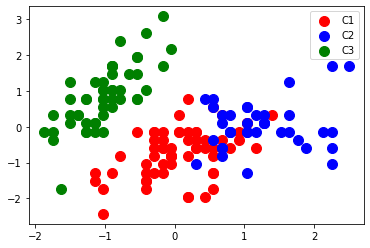

In [ ]:
#VISUALIZATIONS
import matplotlib.pyplot as plt

plt.scatter(x_scaled[y_kmeds == 0, 0], x_scaled[y_kmeds == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmeds == 1, 0], x_scaled[y_kmeds == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmeds == 2, 0], x_scaled[y_kmeds == 2, 1], s = 100, c = 'green', label = 'C3')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeds.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()


# **BIRCH**

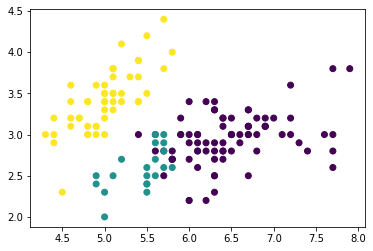

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
import pandas as pd

# Creating the BIRCH clustering model
model = Birch(branching_factor = 100, n_clusters = 3, threshold = 0.5)

# Fit the data (Training)
model.fit(x)

# Predict the same data
y_birch = model.predict(x)
# Creating a scatter plot
#plt.scatter(myiris[:,0],myiris[:,1],c = pred )
#plt.scatter(x,y, c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
#plt.scatter(x[:,0], x[:,1], c = pred , cmap = 'rainbow' , alpha = 0.7 , edgecolors = 'b')
plt.scatter(x[:,0], x[:,1] , c = y_birch)
plt.show()

In [ ]:
from sklearn import metrics
#ARI
print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(y, y_birch))
#SILHOUETTE COEFFICIENT
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, y_birch ))
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
print("Normalized Mutual Info: %0.3f"% NMI(y, y_birch))

Adjusted Rand Index: 0.610
Silhouette Coefficient: 0.502
Normalized Mutual Info: 0.705


# **DBSCAN**

---

---





In [ ]:
from __future__ import division
from itertools import combinations_with_replacement
import numpy as np
import math
import sys

def normalize(X, axis=-1, order=2):
    """ Normalize the dataset X """
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


def euclidean_distance(x1, x2):
    """ Calculates the l2 distance between two vectors """
    distance = 0
    # Squared distance between each coordinate
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)

In [ ]:
from __future__ import print_function, division
import numpy as np
#from mlfromscratch.utils import Plot, euclidean_distance, normalize


class DBSCAN():

    def __init__(self, eps=1, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples



    def _get_neighbors(self, sample_i):

        neighbors = []
        idxs = np.arange(len(self.X))
        for i, _sample in enumerate(self.X[idxs != sample_i]):
            distance = euclidean_distance(self.X[sample_i], _sample)
            if distance < self.eps:
                neighbors.append(i)
        return np.array(neighbors)

    def _expand_cluster(self, sample_i, neighbors):

        cluster = [sample_i]
        # Iterate through neighbors
        for neighbor_i in neighbors:
            if not neighbor_i in self.visited_samples:
                self.visited_samples.append(neighbor_i)
                # Fetch the sample's distant neighbors (neighbors of neighbor)
                self.neighbors[neighbor_i] = self._get_neighbors(neighbor_i)
                # Make sure the neighbor's neighbors are more than min_samples
                # (If this is true the neighbor is a core point)
                if len(self.neighbors[neighbor_i]) >= self.min_samples:
                    # Expand the cluster from the neighbor
                    expanded_cluster = self._expand_cluster(
                        neighbor_i, self.neighbors[neighbor_i])
                    # Add expanded cluster to this cluster
                    cluster = cluster + expanded_cluster
                else:
                    # If the neighbor is not a core point we only add the neighbor point
                    cluster.append(neighbor_i)
        return cluster

    def _get_cluster_labels(self):

        # Set default value to number of clusters
        # Will make sure all outliers have same cluster label
        labels = np.full(shape=self.X.shape[0], fill_value=len(self.clusters))
        for cluster_i, cluster in enumerate(self.clusters):
            for sample_i in cluster:
                labels[sample_i] = cluster_i
        return labels

    # DBSCAN
    def predict(self, X):
        self.X = X
        self.clusters = []
        self.visited_samples = []
        self.neighbors = {}
        n_samples = np.shape(self.X)[0]
        # Iterate through samples and expand clusters from them
        # if they have more neighbors than self.min_samples
        for sample_i in range(n_samples):
            if sample_i in self.visited_samples:
                continue
            self.neighbors[sample_i] = self._get_neighbors(sample_i)
            if len(self.neighbors[sample_i]) >= self.min_samples:
                # If core point => mark as visited
                self.visited_samples.append(sample_i)
                # Sample has more neighbors than self.min_samples => expand
                # cluster from sample
                new_cluster = self._expand_cluster(
                    sample_i, self.neighbors[sample_i])
                # Add cluster to list of clusters
                self.clusters.append(new_cluster)

        # Get the resulting cluster labels
        cluster_labels = self._get_cluster_labels()
        return cluster_labels

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
X = x_scaled
y_dbscan = DBSCAN(eps=0.4, min_samples=10).predict(X)
core_samples_mask = np.zeros_like(y_dbscan, dtype=bool)
core_samples_mask = True

labels = y_dbscan
# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
#print(labels)



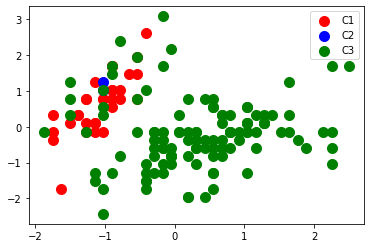

In [ ]:
#VISUALIZATIONS
import matplotlib.pyplot as plt

plt.scatter(x_scaled[y_dbscan == 0, 0], x_scaled[y_dbscan == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_dbscan == 1, 0], x_scaled[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_dbscan == 2, 0], x_scaled[y_dbscan == 2, 1], s = 100, c = 'green', label = 'C3')
#plt.scatter(kmeans.cluster_centers_[:, 0], kdbscan.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [ ]:

print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_dbscan))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X,y_dbscan))
#print("Silhouette Coefficient (original): %0.3f" % metrics.silhouette_score(x,y))
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
print("Normalized Mutual Info: %0.3f"% NMI(y, y_dbscan))



Adjusted Rand Index: 0.217
Silhouette Coefficient: 0.170
Normalized Mutual Info: 0.374


# **CHAMELEON**

---

---





In [ ]:
!pip install metis
!wget http://glaros.dtc.umn.edu/gkhome/fetch/sw/metis/OLD/metis-5.0.3.tar.gz
!tar -xf metis-5.0.3.tar.gz
!mv metis-5.0.3/* ../content/
!make config shared=1
!make install
%env METIS_DLL=/usr/local/lib/libmetis.so

In [ ]:
#import networkx as nx
import metis
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn import datasets
from sklearn.cluster import KMeans, MeanShift, DBSCAN, Birch
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
import networkx as nx
import itertools
from scipy.special import comb
from tqdm import tqdm

In [ ]:
class Chameleon():
    def __init__(self):
        self.cmap = plt.get_cmap('viridis')
        self.colors = [self.cmap(i) for i in np.linspace(0, 1, 10)]

    def plot2d_graph(self, graph):
        pos = nx.get_node_attributes(graph, 'pos')
        c = [self.colors[i % (len(self.colors))]
             for i in nx.get_node_attributes(graph, 'cluster').values()]
        if c:  # is set
            nx.draw(graph, pos, node_color=c, node_size=0.25)
        else:
            nx.draw(graph, pos, node_size=0.25)
        plt.show(block=False)

    def plot2d_data(self, df):
        if (len(df.columns) > 3):
            print("Plot Waring: more than 2-Dimensions!")
        df.plot(kind='scatter', c=df['cluster'], cmap='gist_rainbow', x=0, y=1)
        plt.show(block=False)

    def euclidean_distance(self, a, b):
        return np.linalg.norm(np.array(a) - np.array(b))

    def knn_graph(self, df, k, verbose=False):
        points = [p[1:] for p in df.itertuples()]
        g = nx.Graph()
        for i in range(0, len(points)):
            g.add_node(i)
        if verbose:
            print("Building kNN graph (k = %d)..." % (k))
        iterpoints = tqdm(enumerate(points), total=len(
            points)) if verbose else enumerate(points)
        for i, p in iterpoints:
            distances = list(
                map(lambda x: self.euclidean_distance(p, x), points))
            # second trough kth closest
            closests = np.argsort(distances)[1:k+1]
            # print(distances[0])
            for c in closests:
                #print(distances[c])
                if(distances[c]==0):
                   continue
                else:
                  g.add_edge(i, c, weight=1.0 / distances[c], similarity=int(1.0 / distances[c] * 1e4))
            g.nodes[i]['pos'] = p
        g.graph['edge_weight_attr'] = 'similarity'
        return g

    def part_graph(self, graph, k, df=None):

        edgecuts, parts = metis.part_graph(
            graph, 2 , objtype='cut')
        # print(edgecuts)
        for i, p in enumerate(graph.nodes()):
            graph.nodes[p]['cluster'] = parts[i]
        if df is not None:
            df['cluster'] = nx.get_node_attributes(graph, 'cluster').values()
        return graph

    def pre_part_graph(self, graph, k, df=None, verbose=False):
        if verbose:
            print("Begin clustering...")
        clusters = 0
        for i, p in enumerate(graph.nodes()):
            graph.nodes[p]['cluster'] = 0
        cnts = {}
        cnts[0] = len(graph.nodes())
        while clusters < k - 1:
            maxc = -1
            maxcnt = 0
            for key, val in cnts.items():
                if val > maxcnt:
                    maxcnt = val
                    maxc = key
            s_nodes = [n for n in graph.nodes if graph.nodes[n]
                       ['cluster'] == maxc]
            s_graph = graph.subgraph(s_nodes)
            edgecuts, parts = metis.part_graph(
                s_graph, 2 , objtype='cut')
            new_part_cnt = 0
            for i, p in enumerate(s_graph.nodes()):
                if parts[i] == 1:
                    graph.nodes[p]['cluster'] = clusters + 1
                    new_part_cnt = new_part_cnt + 1
            cnts[maxc] = cnts[maxc] - new_part_cnt
            cnts[clusters + 1] = new_part_cnt
            clusters = clusters + 1

        edgecuts, parts = metis.part_graph(graph, k)
        if df is not None:
            df['cluster'] = nx.get_node_attributes(graph, 'cluster').values()

        return graph

    def get_cluster(self, graph, clusters):
        nodes = [n for n in graph.nodes if graph.nodes[n]['cluster'] in clusters]
        return nodes

    def connecting_edges(self, partitions, graph):
        cut_set = []
        for a in partitions[0]:
            for b in partitions[1]:
                if a in graph:
                    if b in graph[a]:
                        cut_set.append((a, b))
        return cut_set

    def min_cut_bisector(self, graph):
        graph = graph.copy()
        graph = self.part_graph(graph, 2)
        partitions = self.get_cluster(graph, [0]), self.get_cluster(graph, [1])
        return self.connecting_edges(partitions, graph)

    def get_weights(self, graph, edges):
        return [graph[edge[0]][edge[1]]['weight'] for edge in edges]

    def bisection_weights(self, graph, cluster):
        cluster = graph.subgraph(cluster)
        edges = self.min_cut_bisector(cluster)
        weights = self.get_weights(cluster, edges)
        return weights


    def external_index(self , v1, v2):
        TP, FN, FP, TN = self.confusion_index(v1, v2)
        RI = (TP + TN) / (TP + FN + FP + TN)
        ARI = 2 * (TP * TN - FN * FP) / ((TP + FN) *
                                        (FN + TN) + (TP + FP) * (FP + TN))
        JI = TP / (TP + FN + FP)
        FM = TP / np.sqrt((TP + FN) * (TP + FP))
        return RI, ARI, JI, FM


    def confusion_index(self , v1, v2):
        cmatrix = self.contingency(v1, v2)
        size = np.size(v1)
        sum_rows = np.sum(cmatrix, 0)
        sum_cols = np.sum(cmatrix, 1)
        N = comb(size, 2)
        TP = np.sum(list(map(lambda x: comb(x, 2), cmatrix)))
        FN = np.sum(list(map(lambda x: comb(x, 2), sum_rows))) - TP
        FP = np.sum(list(map(lambda x: comb(x, 2), sum_cols))) - TP
        TN = N - TP - FN - FP
        return TP, FN, FP, TN


    def contingency(self , v1, v2):
        res = np.zeros((np.max(v1), np.max(v2)))
        for i in range(0, np.size(v1)):
            res[v1[i] - 1, v2[i] - 1] = res[v1[i] - 1, v2[i] - 1] + 1
        return res


    def internal_interconnectivity(self , graph, cluster):
        return np.sum(self.bisection_weights(graph, cluster))


    def relative_interconnectivity(self , graph, cluster_i, cluster_j):
        edges = self.connecting_edges((cluster_i, cluster_j), graph)
        EC = np.sum(self.get_weights(graph, edges))
        ECci, ECcj = self.internal_interconnectivity(graph, cluster_i), self.internal_interconnectivity(graph, cluster_j)
        return EC / ((ECci + ECcj) / 2.0)


    def internal_closeness(self , graph, cluster):
        cluster = graph.subgraph(cluster)
        edges = cluster.edges()
        weights = self.get_weights(cluster, edges)
        return np.sum(weights)


    def relative_closeness(self , graph, cluster_i, cluster_j):
        edges = self.connecting_edges((cluster_i, cluster_j), graph)
        if not edges:
            return 0.0
        else:
            SEC = np.mean(self.get_weights(graph, edges))
        Ci, Cj = self.internal_closeness(graph, cluster_i), self.internal_closeness(graph, cluster_j)
        SECci, SECcj = np.mean(self.bisection_weights(graph, cluster_i)), np.mean(
            self.bisection_weights(graph, cluster_j))
        return SEC / ((Ci / (Ci + Cj) * SECci) + (Cj / (Ci + Cj) * SECcj))


    def merge_score(self , g, ci, cj, a):
        return self.relative_interconnectivity(g, ci, cj) * np.power(self.relative_closeness(g, ci, cj), a)


    def merge_best(self , graph, df, a, k, verbose=False):
        clusters = np.unique(df['cluster'])
        max_score = 0
        ci, cj = -1, -1
        if len(clusters) <= k:
            return False

        for combination in itertools.combinations(clusters, 2):
            i, j = combination
            if i != j:
                if verbose:
                    print("Checking c%d c%d" % (i, j))
                gi = self.get_cluster(graph, [i])
                gj = self.get_cluster(graph, [j])
                edges = self.connecting_edges((gi, gj), graph)
                if not edges:
                    continue
                ms = self.merge_score(graph, gi, gj, a)
                if verbose:
                    print("Merge score: %f" % (ms))
                if ms > max_score:
                    if verbose:
                        print("Better than: %f" % (max_score))
                    max_score = ms
                    ci, cj = i, j

        if max_score > 0:
            if verbose:
                print("Merging c%d and c%d" % (ci, cj))
            df.loc[df['cluster'] == cj, 'cluster'] = ci
            for i, p in enumerate(graph.nodes()):
                if graph.nodes[p]['cluster'] == cj:
                    graph.nodes[p]['cluster'] = ci

        return max_score > 0


    def cluster(self , df, k, knn=10, m=30, alpha=2.0, verbose=False, plot=False):
        graph = self.knn_graph(df, knn, verbose=True)
        graph = self.pre_part_graph(graph, m, df, verbose=True)
        iterm = tqdm(enumerate(range(m - k)), total=m-k)
        for i in iterm:
            self.merge_best(graph, df, alpha, k, verbose)
            if plot:
                self.plot2d_data(df)
        res = self.rebuild_labels(df)
        return res


    def rebuild_labels(self , df):
        ans = df.copy()
        clusters = list(pd.DataFrame(df['cluster'].value_counts()).index)
        c = 1
        for i in clusters:
            ans.loc[df['cluster'] == i, 'cluster'] = c
            c = c + 1
        return ans




















  0%|          | 0/150 [00:00<?, ?it/s]

















 41%|████      | 61/150 [00:00<00:00, 603.41it/s]

Building kNN graph (k = 20)...




















100%|██████████| 150/150 [00:00<00:00, 567.44it/s]


















  0%|          | 0/37 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:163: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Begin clustering...




















  3%|▎         | 1/37 [00:00<00:25,  1.40it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:163: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


















  5%|▌         | 2/37 [00:01<00:25,  1.40it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:163: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


















  8%|▊        

Plot Waring: more than 2-Dimensions!


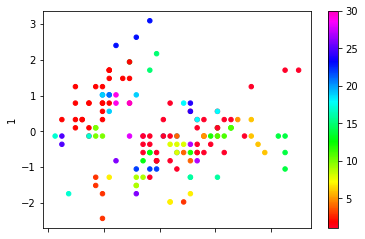

In [ ]:
import pandas as pd
# get a set of data points
#data = datasets.load_boston()
#X, y = pd.DataFrame(data.data), data.target
from sklearn import datasets
myiris = datasets.load_iris()
x= myiris.data
#print(x)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
#y_db = y
X = x_scaled
y = myiris.target
chameleon_cluster = Chameleon()
X_test=pd.DataFrame(X)
# returns a pands.dataframe of cluster
res = chameleon_cluster.cluster(X_test, 3, knn=20, m=40, alpha=2.0)
# draw a 2-D scatter plot with cluster
chameleon_cluster.plot2d_data(res)

In [ ]:
#print(res)
y_chem =res['cluster']
y_chameleon = np.array(y_chem)
#y_chemeleon.reshape(-1)
#print(y_chameleon)

In [ ]:
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_chameleon))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X,y_chameleon))
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
print("Normalized Mutual Info: %0.3f"% NMI(y, y_chameleon))

Adjusted Rand Index: 0.178
Silhouette Coefficient: -0.135
Normalized Mutual Info: 0.429


# **AGNES**

---

---





In [ ]:
from math import sqrt
import sys
import copy


def get_hackerrank_input():

    data_points = list()
    number_of_clusters = 0
    first_line = True
    for line in sys.stdin.readlines():
        if first_line:
            number_of_clusters = int(line.strip().split()[1])
            first_line = False
        else:
            data_point = list()
            coordinates = line.strip().split()
            for coordinate in coordinates:
                data_point.append(float(coordinate))
            data_points.append(data_point)

    return data_points, number_of_clusters


def get_input():
    data_points = [[8.98320053625, -2.08946304844], [2.61615632899, 9.46426282022],
                   [1.60822068547, 8.29785986996], [8.64957587261, -0.882595891607],
                   [1.01364234605, 10.0300852081], [1.49172651098, 8.68816850944],
                   [7.95531802235, -1.96381815529], [0.527763520075, 9.22731148332],
                   [6.91660822453, -3.2344537134], [6.48286208351, -0.605353440895]]
    number_of_clusters = 2
    return data_points, number_of_clusters



def euclidean_distance(pointA, pointB):
    distance = float(0.0)
    for index in range(len(pointA)):
        distance += (pointA[index] - pointB[index])**2
    return sqrt(distance)


def create_proximity_matrix(data_points):

    proximity_matrix = list()
    for which_row in range(len(data_points)):
        row_matrix = [float("inf")] * len(data_points)
        for which_column in range(which_row):
            row_value = data_points[which_row]
            column_value = data_points[which_column]
            distance = euclidean_distance(row_value, column_value)
            row_matrix[which_column] = distance
        proximity_matrix.append(row_matrix)

    return proximity_matrix


def find_matrix_minimum(proximity_matrix):
    minimum_distance = float("inf")
    minimum_distance_at_row = None
    minimum_distance_at_column = None
    for which_row in range(len(proximity_matrix)):
        for which_column in range(which_row):

            # Tie breaking condition mentioned in HW
            if minimum_distance == proximity_matrix[which_row][which_column]:
                if not ((min(minimum_distance_at_row, minimum_distance_at_column) == min(which_row, which_column)) and (max(minimum_distance_at_row, minimum_distance_at_column) < max(which_row, which_column))):
                    minimum_distance = proximity_matrix[which_row][which_column]
                    minimum_distance_at_row = which_row
                    minimum_distance_at_column = which_column
            elif minimum_distance > proximity_matrix[which_row][which_column]:
                minimum_distance = proximity_matrix[which_row][which_column]
                minimum_distance_at_row = which_row
                minimum_distance_at_column = which_column

    return min(minimum_distance_at_row, minimum_distance_at_column), max(minimum_distance_at_row, minimum_distance_at_column)


def update_proximity_matrix(proximity_matrix, merge_row, merge_column):

    previous_proximity_matrix = copy.deepcopy(proximity_matrix)

    merge_row_values = proximity_matrix[merge_row]
    merge_column_values = proximity_matrix[merge_column]

    # Update merge row values
    add_new_row = [float("inf")]*len(proximity_matrix)
    for which_column in range(merge_row):
        replacing_value = min(merge_row_values[which_column], merge_column_values[which_column])
        add_new_row[which_column] = replacing_value
    # Delete merge row and replace with revised values
    del proximity_matrix[merge_row]
    proximity_matrix.insert(merge_row, add_new_row)

    # Update column values
    for which_row in range(len(previous_proximity_matrix)):
        if which_row > merge_row:
            minimum_of_matrix_similarity = min(previous_proximity_matrix[merge_column][which_row], previous_proximity_matrix[which_row][merge_column])
            replacing_value = min(previous_proximity_matrix[which_row][merge_row], minimum_of_matrix_similarity)
            proximity_matrix[which_row][merge_row] = replacing_value
        # Delete the merge column in each row
        del proximity_matrix[which_row][merge_column]

    # Delete entire merge row; here merge column which is actually one of the row
    del proximity_matrix[merge_column]

    return proximity_matrix


def agnes(data_points, desired_number_of_clusters):

    cluster_ids = list()
    for which_point in range(len(data_points)):
        a_cluster = list()
        a_cluster.append(which_point)
        cluster_ids.append(a_cluster)

    number_of_clusters = len(cluster_ids)

    proximity_matrix = create_proximity_matrix(data_points)

    while number_of_clusters > desired_number_of_clusters:

        row, column = find_matrix_minimum(proximity_matrix=proximity_matrix)

        proximity_matrix = update_proximity_matrix(proximity_matrix=proximity_matrix,merge_row=row, merge_column=column)

        cluster_ids = update_cluster_ids(cluster_ids, row, column)

        number_of_clusters = len(cluster_ids)

    datapoints_to_cluster_mapping = dict()
    for which_cluster, current_cluster in enumerate(cluster_ids):
        for which_point in current_cluster:
            datapoints_to_cluster_mapping[which_point] = current_cluster[0]

    predicted_labels = list()
    for key in sorted(datapoints_to_cluster_mapping.keys()):
        predicted_labels.append(datapoints_to_cluster_mapping[key])
        # Printing output here!
        #print (datapoints_to_cluster_mapping[key])

    return predicted_labels


def update_cluster_ids(cluster_ids, row, column):

    # We know than row value < column value
    cluster_A = cluster_ids[row]
    cluster_B = cluster_ids[column]
    combine_cluster = list()

    for cluster_id in cluster_A:
        combine_cluster.append(cluster_id)
    for cluster_id in cluster_B:
        combine_cluster.append(cluster_id)

    cluster_ids.pop(row)
    cluster_ids.pop(column-1)
    cluster_ids.insert(row,combine_cluster)

    return cluster_ids


def read_testcase_input(sourceFile):
    datapoints = list()
    with open(sourceFile, 'r') as file:
        for line in file:
            point = list()
            for coordinate in line.split():
                point.append(float(coordinate))
            datapoints.append(point)

    number_of_clusters = int(datapoints[0][1])
    datapoints = datapoints[1:]

    return datapoints, number_of_clusters


def read_testcase_output(sourceFile):

    labels = list()
    with open(sourceFile, 'r') as file:
        for line in file:
            labels.append(int(line.strip()))

    return labels


def check_accuracy(truth, predicted):

    correct_answers = list()
    wrong_answers = list()
    for which_label in range(len(truth)):
        point = list()
        point.append(which_label)
        point.append(truth[which_label])
        point.append(predicted[which_label])

        if truth[which_label] == predicted[which_label]:
            correct_answers.append(point)
        else:
            wrong_answers.append(point)

    accuracy = len(correct_answers)/len(truth) * 100

    return accuracy

In [ ]:


# Extra test case
# data_points, desired_number_of_clusters = read_testcase_input(sourceFile="AGNES_testcase.txt")
# true_labels = read_testcase_output(sourceFile="AGNES_testcase_output.txt")
from sklearn import datasets
myiris = datasets.load_iris()
x= myiris.data
y= myiris.target
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
x_scaled_new = np.ndarray.tolist(x_scaled)
#type(x_scaled_new)
data_points, desired_number_of_clusters = x_scaled_new , 3
# data_points, desired_number_of_clusters = get_hackerrank_input()
# AGNES
y_agnes = agnes(data_points, desired_number_of_clusters)

# Accuracy; printing stuff
#check_accuracy(truth=y, predicted=y_agnes)

In [ ]:
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_agnes))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X,y_agnes))
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
print("Normalized Mutual Info: %0.3f"% NMI(y, y_agnes))

Adjusted Rand Index: 0.558
Silhouette Coefficient: 0.505
Normalized Mutual Info: 0.720
